## FINAL PROJECT -
## IMDB MOVIE REVIEWS and BOX OFFICE EARINGS.

### TEAM - HASHIKA LEWIS (VK27137)

#### This is an individual project

In [101]:
import pandas as pd
import os
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Overview - 
### I am using the 5000 imdb movie reviews data set and box office earnings dataset to find relations between- 
### 1. genres and imdb scores
### 2. relation between Budget and Worldwide Gross
### 3. Finding a strategy with which movies are released
### 4. content rating and genres

In [43]:
df=pd.read_csv('E:\\Data Science\\IMDB5000_movies.csv')
db=pd.read_csv('E:\\Data Science\\BoxOffice..csv')

In [44]:
df.head()

color      director_name  num_critic_for_reviews  duration  \
0  Color      James Cameron                   723.0     178.0   
1  Color     Gore Verbinski                   302.0     169.0   
2  Color         Sam Mendes                   602.0     148.0   
3  Color  Christopher Nolan                   813.0     164.0   
4    NaN        Doug Walker                     NaN       NaN   

   director_facebook_likes  actor_3_facebook_likes      actor_2_name  \
0                      0.0                   855.0  Joel David Moore   
1                    563.0                  1000.0     Orlando Bloom   
2                      0.0                   161.0      Rory Kinnear   
3                  22000.0                 23000.0    Christian Bale   
4                    131.0                     NaN        Rob Walker   

   actor_1_facebook_likes        gross                           genres  \
0                  1000.0  760505847.0  Action|Adventure|Fantasy|Sci-Fi   
1                 40000.0  309404152.0         Action|Adventure|Fantasy   
2                 11000.0  200074175.0        Action|Adventure|Thriller   
3                 27000.0  448130642.0                  Action|Thriller   
4                   131.0          NaN                      Documentary   

           ...          num_user_for_reviews language country  content_rating  \
0          ...                        3054.0  English     USA           PG-13   
1          ...                        1238.0  English     USA           PG-13   
2          ...                         994.0  English      UK           PG-13   
3          ...                        2701.0  English     USA           PG-13   
4          ...                           NaN      NaN     NaN             NaN   

        budget title_year  actor_2_facebook_likes imdb_score aspect_ratio  \
0  237000000.0     2009.0                   936.0        7.9         1.78   
1  300000000.0     2007.0                  5000.0        7.1         2.35   
2  245000000.0     2015.0                   393.0        6.8         2.35   
3  250000000.0     2012.0                 23000.0        8.5         2.35   
4          NaN        NaN                    12.0        7.1          NaN   

   movie_facebook_likes  
0               33000.0  
1                   0.0  
2               85000.0  
3              164000.0  
4                   0.0  

[5 rows x 29 columns]

IMDB Movie reviews - this dataset has information about 5000 movies on imdb. this dataset has 29 rows of data. some of the important attributes that i plan on working with from this dataset are, genres, content rating, duration , facebook likes, film_title, directorname etc 

In [45]:
db.head()

Movie Month  Day  Year  Budget($M)  \
0                                Avatar   Dec   18  2009       425.0   
1                               Titanic   Dec   19  1997       200.0   
2  Star Wars Ep. VII: The Force Awakens   Dec   18  2015       306.0   
3                        Jurassic World   Jun   12  2015       215.0   
4                          The Avengers   May    4  2012       225.0   

   Domestic Gross($M)  Worldwide Gross($M)  
0          760.507625          2783.918982  
1          659.363944          2208.208395  
2          936.662225          2058.662225  
3          652.270625          1671.713208  
4          623.279547          1519.479547

BoxOffice Earnings - This dataset has information about the day of release, with year and month, Domestic Gross, Worldwide gross of about 5000 movies

### Data Integration

I choose to perform intergration before data preporcessing as, after merge, they maybe some data lost for which we might waste time preprocessing now


In [46]:
df.tail(20)

color director_name  num_critic_for_reviews  duration  \
5603   NaN           NaN                     NaN       NaN   
5604   NaN           NaN                     NaN       NaN   
5605   NaN           NaN                     NaN       NaN   
5606   NaN           NaN                     NaN       NaN   
5607   NaN           NaN                     NaN       NaN   
5608   NaN           NaN                     NaN       NaN   
5609   NaN           NaN                     NaN       NaN   
5610   NaN           NaN                     NaN       NaN   
5611   NaN           NaN                     NaN       NaN   
5612   NaN           NaN                     NaN       NaN   
5613   NaN           NaN                     NaN       NaN   
5614   NaN           NaN                     NaN       NaN   
5615   NaN           NaN                     NaN       NaN   
5616   NaN           NaN                     NaN       NaN   
5617   NaN           NaN                     NaN       NaN   
5618   NaN           NaN                     NaN       NaN   
5619   NaN           NaN                     NaN       NaN   
5620   NaN           NaN                     NaN       NaN   
5621   NaN           NaN                     NaN       NaN   
5622   NaN           NaN                     NaN       NaN   

      director_facebook_likes  actor_3_facebook_likes actor_2_name  \
5603                      NaN                     NaN          NaN   
5604                      NaN                     NaN          NaN   
5605                      NaN                     NaN          NaN   
5606                      NaN                     NaN          NaN   
5607                      NaN                     NaN          NaN   
5608                      NaN                     NaN          NaN   
5609                      NaN                     NaN          NaN   
5610                      NaN                     NaN          NaN   
5611                      NaN                     NaN          NaN   
5612                      NaN                     NaN          NaN   
5613                      NaN                     NaN          NaN   
5614                      NaN                     NaN          NaN   
5615                      NaN                     NaN          NaN   
5616                      NaN                     NaN          NaN   
5617                      NaN                     NaN          NaN   
5618                      NaN                     NaN          NaN   
5619                      NaN                     NaN          NaN   
5620                      NaN                     NaN          NaN   
5621                      NaN                     NaN          NaN   
5622                      NaN                     NaN          NaN   

      actor_1_facebook_likes  gross genres          ...           \
5603                     NaN    NaN    NaN          ...            
5604                     NaN    NaN    NaN          ...            
5605                     NaN    NaN    NaN          ...            
5606                     NaN    NaN    NaN          ...            
5607                     NaN    NaN    NaN          ...            
5608                     NaN    NaN    NaN          ...            
5609                     NaN    NaN    NaN          ...            
5610                     NaN    NaN    NaN          ...            
5611                     NaN    NaN    NaN          ...            
5612                     NaN    NaN    NaN          ...            
5613                     NaN    NaN    NaN          ...            
5614                     NaN    NaN    NaN          ...            
5615                     NaN    NaN    NaN          ...            
5616                     NaN    NaN    NaN          ...            
5617                     NaN    NaN    NaN          ...            
5618                     NaN    NaN    NaN          ...            
5619                     NaN    NaN    NaN          ...            
5620   

As we can notice, the rows in the bottom, all consist of missing values. Dropping all of the rows with Nan would delete a lot of rows. Since df contains 29 columns, i would delete rows where more than 20 columns conatin Nan

In [47]:
df=df.dropna(thresh=20)

The columns on which Im integrating both the data frames are movie names, as they are the only values that are unique 

In [48]:
dc = pd.merge(df, db, left_on = 'film_title', right_on = 'Movie')    

In [49]:
dc

color       director_name  num_critic_for_reviews  duration  \
0                Color       James Cameron                   723.0     178.0   
1                Color          Sam Mendes                   602.0     148.0   
2                Color   Christopher Nolan                   813.0     164.0   
3                Color      Andrew Stanton                   462.0     132.0   
4                Color           Sam Raimi                   392.0     156.0   
5                Color           Sam Raimi                   392.0     156.0   
6                Color        Nathan Greno                   324.0     100.0   
7                Color         Joss Whedon                   635.0     141.0   
8                Color         David Yates                   375.0     153.0   
9                Color         Zack Snyder                   673.0     183.0   
10               Color        Bryan Singer                   434.0     169.0   
11               Color        Marc Forster                   403.0     106.0   
12               Color      Gore Verbinski                   450.0     150.0   
13               Color         Zack Snyder                   733.0     143.0   
14               Color      Andrew Adamson                   258.0     150.0   
15               Color         Joss Whedon                   703.0     173.0   
16               Color         Joss Whedon                   703.0     173.0   
17               Color         Joss Whedon                   703.0     173.0   
18               Color         Joss Whedon                   703.0     173.0   
19               Color        Rob Marshall                   448.0     136.0   
20               Color    Barry Sonnenfeld                   451.0     106.0   
21               Color       Peter Jackson                   422.0     164.0   
22               Color           Marc Webb                   599.0     153.0   
23               Color        Ridley Scott                   343.0     156.0   
24               Color       Peter Jackson                   509.0     186.0   
25               Color         Chris Weitz                   251.0     113.0   
26               Color       Peter Jackson                   446.0     201.0   
27               Color       Peter Jackson                   446.0     201.0   
28               Color       Peter Jackson                   446.0     201.0   
29               Color       Peter Jackson                   446.0     201.0   
...                ...                 ...                     ...       ...   
4247   Black and White     Andrew Bujalski                    52.0     109.0   
4248             Color         Damir Catic                     NaN      89.0   
4249             Color        Ben Wheatley                    53.0      93.0   
4250   Black and White         Kevin Smith                   136.0     102.0   
4251             Color       James Bidgood                     8.0      65.0   
4252             Color     Andrew Bujalski                    43.0      85.0   
4253             Color         Neil LaBute                    80.0      97.0   
4254             Color          Eric Eason                    28.0      79.0   
4255   Black and White   Richard Linklater                    61.0     100.0   
4256             Color     Joseph Mazzella                     NaN      90.0   
4257             Color        Travis Legge                     1.0      90.0   
4258             Color       Alex Kendrick                     5.0     120.0   
4259               NaN     Brandon Landers                     NaN     143.0   
4260             Color         Jay Duplass                    51.0      85.0   
4261   Black and White          Jim Chuchu                     6.0      60.0   
4262             Color          Daryl Wein                    22.0      88.0   
4263             Color         Jason Trost                    42.0      78.0   
4264             Color         John Waters                    73.0     108.0   
4265             

Now we can perform data preprocessing on the merged dataset dc

### Data Preprocessing 

In [50]:
#dropping duplicates
dc = dc.drop_duplicates(subset='film_title', keep='first', inplace=False)


In [51]:
dc

color       director_name  num_critic_for_reviews  duration  \
0                Color       James Cameron                   723.0     178.0   
1                Color          Sam Mendes                   602.0     148.0   
2                Color   Christopher Nolan                   813.0     164.0   
3                Color      Andrew Stanton                   462.0     132.0   
4                Color           Sam Raimi                   392.0     156.0   
6                Color        Nathan Greno                   324.0     100.0   
7                Color         Joss Whedon                   635.0     141.0   
8                Color         David Yates                   375.0     153.0   
9                Color         Zack Snyder                   673.0     183.0   
10               Color        Bryan Singer                   434.0     169.0   
11               Color        Marc Forster                   403.0     106.0   
12               Color      Gore Verbinski                   450.0     150.0   
13               Color         Zack Snyder                   733.0     143.0   
14               Color      Andrew Adamson                   258.0     150.0   
15               Color         Joss Whedon                   703.0     173.0   
19               Color        Rob Marshall                   448.0     136.0   
20               Color    Barry Sonnenfeld                   451.0     106.0   
21               Color       Peter Jackson                   422.0     164.0   
22               Color           Marc Webb                   599.0     153.0   
23               Color        Ridley Scott                   343.0     156.0   
24               Color       Peter Jackson                   509.0     186.0   
25               Color         Chris Weitz                   251.0     113.0   
26               Color       Peter Jackson                   446.0     201.0   
35               Color       James Cameron                   315.0     194.0   
36               Color       Anthony Russo                   516.0     147.0   
37               Color          Peter Berg                   377.0     131.0   
38               Color     Colin Trevorrow                   644.0     124.0   
39               Color          Sam Mendes                   750.0       1.0   
41               Color           Sam Raimi                   300.0     135.0   
42               Color         Shane Black                   608.0     195.0   
...                ...                 ...                     ...       ...   
4247   Black and White     Andrew Bujalski                    52.0     109.0   
4248             Color         Damir Catic                     NaN      89.0   
4249             Color        Ben Wheatley                    53.0      93.0   
4250   Black and White         Kevin Smith                   136.0     102.0   
4251             Color       James Bidgood                     8.0      65.0   
4252             Color     Andrew Bujalski                    43.0      85.0   
4253             Color         Neil LaBute                    80.0      97.0   
4254             Color          Eric Eason                    28.0      79.0   
4255   Black and White   Richard Linklater                    61.0     100.0   
4256             Color     Joseph Mazzella                     NaN      90.0   
4257             Color        Travis Legge                     1.0      90.0   
4258             Color       Alex Kendrick                     5.0     120.0   
4259               NaN     Brandon Landers                     NaN     143.0   
4260             Color         Jay Duplass                    51.0      85.0   
4261   Black and White          Jim Chuchu                     6.0      60.0   
4262             Color          Daryl Wein                    22.0      88.0   
4263             Color         Jason Trost                    42.0      78.0   
4264             Color         John Waters                    73.0     108.0   
4265             

In [52]:
#check number of rows and value of intersection. if they are equal, duplicates are removed
len(set(df['film_title']).intersection(set(db['Movie'])))

3967

In [53]:
list(dc)

['color',
 'director_name',
 'num_critic_for_reviews',
 'duration',
 'director_facebook_likes',
 'actor_3_facebook_likes',
 'actor_2_name',
 'actor_1_facebook_likes',
 'gross',
 'genres',
 'actor_1_name',
 'movie_title',
 'film_title',
 'num_voted_users',
 'cast_total_facebook_likes',
 'actor_3_name',
 'facenumber_in_poster',
 'plot_keywords',
 'movie_imdb_link',
 'num_user_for_reviews',
 'language',
 'country',
 'content_rating',
 'budget',
 'title_year',
 'actor_2_facebook_likes',
 'imdb_score',
 'aspect_ratio',
 'movie_facebook_likes',
 'Movie',
 'Month',
 'Day',
 'Year',
 'Budget($M)',
 'Domestic Gross($M)',
 'Worldwide Gross($M)']

There are attributes like the second and thirs main actor's facebook likes, their names,the link of the movie on imdb, aspect ratio, movie_title, facebook likes on poster, year_title. 
i'm deleting some of them like aspect ratio, movie link, actor 2 and actor 3 likes because I think some are unecessary and some wouldnt be insightful

year_title , movie_title, are repetitive, therefore Im dropping the columns

In [54]:
del dc['actor_2_facebook_likes']
del dc['actor_3_facebook_likes']
del dc['actor_3_name']
del dc['actor_2_name']

In [55]:
del dc['gross']
del dc['aspect_ratio']
del dc['movie_title']
del dc['facenumber_in_poster']
del dc['movie_imdb_link']
del dc['budget']
del dc['title_year']

In [56]:
dc.head()

color      director_name  num_critic_for_reviews  duration  \
0  Color      James Cameron                   723.0     178.0   
1  Color         Sam Mendes                   602.0     148.0   
2  Color  Christopher Nolan                   813.0     164.0   
3  Color     Andrew Stanton                   462.0     132.0   
4  Color          Sam Raimi                   392.0     156.0   

   director_facebook_likes  actor_1_facebook_likes  \
0                      0.0                  1000.0   
1                      0.0                 11000.0   
2                  22000.0                 27000.0   
3                    475.0                   640.0   
4                      0.0                 24000.0   

                            genres     actor_1_name             film_title  \
0  Action|Adventure|Fantasy|Sci-Fi      CCH Pounder                 Avatar   
1        Action|Adventure|Thriller  Christoph Waltz                Spectre   
2                  Action|Thriller        Tom Hardy  The Dark Knight Rises   
3          Action|Adventure|Sci-Fi     Daryl Sabara            John Carter   
4         Action|Adventure|Romance     J.K. Simmons           Spider-Man 3   

   num_voted_users         ...          content_rating imdb_score  \
0         886204.0         ...                   PG-13        7.9   
1         275868.0         ...                   PG-13        6.8   
2        1144337.0         ...                   PG-13        8.5   
3         212204.0         ...                   PG-13        6.6   
4         383056.0         ...                   PG-13        6.2   

   movie_facebook_likes                  Movie Month Day  Year  Budget($M)  \
0               33000.0                 Avatar   Dec  18  2009       425.0   
1               85000.0                Spectre   Nov   6  2015       300.0   
2              164000.0  The Dark Knight Rises   Jul  20  2012       275.0   
3               24000.0            John Carter   Mar   9  2012       275.0   
4                   0.0           Spider-Man 3   May   4  2007       258.0   

  Domestic Gross($M) Worldwide Gross($M)  
0         760.507625         2783.918982  
1         200.074175          879.620923  
2         448.139099         1084.439099  
3          73.058679          282.778100  
4         336.530303          894.860230  

[5 rows x 25 columns]

#### Let's clean the data column-by-column

In [57]:
dc.content_rating.unique()

array(['PG-13', 'PG', 'G', 'R', nan, 'Not Rated', 'Unrated', 'Approved',
       'NC-17', 'X', 'GP', 'M', 'Passed', 'TV-G'], dtype=object)

G – General Audiences
All ages admitted. Nothing that would offend parents for viewing by children.

PG – Parental Guidance Suggested
Some material may not be suitable for children. Parents urged to give "parental guidance". May contain some material parents might not like for their young children.

PG-13 – Parents Strongly Cautioned
Some material may be inappropriate for children under 13. Parents are urged to be cautious. Some material may be inappropriate for pre-teenagers.

R – Restricted
Under 17 requires accompanying parent or adult guardian. Contains some adult material. Parents are urged to learn more about the film before taking their young children with them.

NC-17 – Adults Only
No One 17 and Under Admitted. Clearly adult. Children are not admitted.

These are the main ratings used for content. Over the years, the Motion Picture Association of America (MPAA) film rating system have changed the symbols. like - 
1. X is now NC-17
2. Approved and Passed where intermediate symbols for a final rating G
3. GP is now PG
4. M is now PG
5. TV-G is now G
The ones not rated/unrated will be megred as one symbol and the nan values will be filled as Missed


In [58]:
dc['content_rating'] = dc['content_rating'].map({'X': 'NC-17', 'Not Rated': 'Unrated','Approved': 'G', 'Passed':'G', 'G':'G', 'NC-17':'NC-17','Unrated':'Unrated','R':'R', 'PG-13':'PG-13', 'GP':'PG','M':'PG','PG':'PG','TV-G':'G'})
dc.content_rating = dc.content_rating.fillna('missing')

C:\Users\hashi\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\hashi\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\generic.py:4401: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [59]:
dc.content_rating.unique()

array(['PG-13', 'PG', 'G', 'R', 'missing', 'Unrated', 'NC-17'],
      dtype=object)

##### Columns that contain number of likes on facebook or number of reviews will be filled with zero as some people might not have a facebook account or some movies weren't reviewed

In [60]:
dc.director_facebook_likes = dc.director_facebook_likes.fillna(0)

C:\Users\hashi\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\generic.py:4401: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [61]:
dc.actor_1_facebook_likes = dc.actor_1_facebook_likes.fillna(0)

C:\Users\hashi\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\generic.py:4401: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [62]:
#fillinf na with not available 
dc.actor_1_name = dc.actor_1_name.fillna('NotAvailable')

C:\Users\hashi\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\generic.py:4401: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [63]:
dc.duration.unique()

array([178., 148., 164., 132., 156., 100., 141., 153., 183., 169., 106.,
       150., 143., 173., 136., 186., 113., 201., 194., 147., 131., 124.,
         1., 135., 195., 108., 104., 165., 130., 142., 123., 103., 118.,
       140., 149., 114., 154., 122.,  93.,  91., 158., 127., 110., 144.,
       152.,  96.,  94., 126., 112., 176.,  95.,  97., 109., 128., 102.,
       101., 120.,  98., 121., 182., 166., 137., 184., 206., 138., 157.,
       115., 111.,  89., 105., 119., 129., 146.,  88.,  99.,  90.,  85.,
        92., 196., 133., 116., 215., 117., 107.,  82.,  nan, 174., 125.,
        77., 134., 170.,  76., 171.,  84., 151., 145.,  78., 240., 172.,
        87., 216., 192.,  83., 139.,  86., 162.,  80.,  81., 177.,  73.,
       163., 159., 212., 187., 189., 188.,  74., 280., 190.,  75., 220.,
       160., 325., 251., 155., 202., 289., 161.,  79.,  63., 167., 193.,
       175., 185., 219., 271.,  72.,  68., 225.,   7., 236., 180., 227.,
        69., 293., 200., 168., 181., 300.,  41., 22

Obviously, a movie cannot be zero minutes. So i decided to fillna with the mean of the data

In [64]:
dc.duration = dc.duration.fillna(dc.duration.mean())

C:\Users\hashi\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\generic.py:4401: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [65]:
dc.num_voted_users = dc.num_voted_users.fillna(0)

C:\Users\hashi\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\generic.py:4401: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [66]:
dc.cast_total_facebook_likes = dc.cast_total_facebook_likes.fillna(0)

C:\Users\hashi\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\generic.py:4401: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [67]:
dc.plot_keywords = dc.plot_keywords.fillna('NotAvailable')

C:\Users\hashi\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\generic.py:4401: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [68]:
dc.language.unique()

array(['English', 'Aboriginal', 'Spanish', 'French', 'Filipino', 'Hindi',
       'Russian', 'Mandarin', 'Maya', 'Telugu', 'Aramaic', 'Italian',
       'Cantonese', 'Dari', 'Japanese', 'German', 'Hungarian',
       'Portuguese', nan, 'Thai', 'Korean', 'Dutch', 'Kannada', 'None',
       'Zulu', 'Panjabi', 'Polish', 'Norwegian', 'Hebrew', 'Arabic',
       'Tamil', 'Vietnamese', 'Indonesian', 'Urdu', 'Persian',
       'Slovenian', 'Swedish', 'Swahili'], dtype=object)

In [71]:
#fillinf nan with not available string 
dc.language = dc.language.fillna('notAvailable')

C:\Users\hashi\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\generic.py:4401: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [73]:
dc.imdb_score.unique()
#already clean

array([7.9, 6.8, 8.5, 6.6, 6.2, 7.8, 7.5, 6.9, 6.1, 6.7, 6.5, 7.2, 8.1,
       7. , 7.7, 8.2, 5.9, 7.3, 6. , 5.7, 6.4, 6.3, 5.6, 8.3, 8. , 5.8,
       5.4, 9. , 4.8, 5.2, 7.6, 4.5, 5.5, 8.6, 8.8, 7.1, 5.1, 4.2, 5. ,
       7.4, 4.9, 3.7, 4.3, 3.8, 4.4, 3.3, 5.3, 2.2, 8.9, 8.7, 4.6, 3.4,
       4.1, 4.7, 8.4, 3. , 3.6, 2.4, 2.7, 1.7, 4. , 2. , 3.5, 9.3, 2.9,
       3.9, 2.3, 1.9, 2.8, 3.1, 1.6, 2.5, 2.1, 9.2, 3.2])

In [74]:
dc.movie_facebook_likes = dc.movie_facebook_likes.fillna(0)

C:\Users\hashi\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\generic.py:4401: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [75]:
del dc['Movie']
#repeated column

In [77]:
dc.Month.unique()
#already clean

array(['Dec', 'Nov', 'Jul', 'Mar', 'May', 'Jun', 'Apr', 'Aug', 'Feb',
       'Oct', 'Jan', 'Sep'], dtype=object)

In [80]:
dc.Day.unique()
#already clean

array([18,  6, 20,  9,  4, 24,  1, 15, 25, 28, 14,  2, 16, 17,  3, 13,  7,
       19, 12,  8, 30,  5, 26, 21, 27, 23, 10, 29, 22, 11, 31],
      dtype=int64)

In [81]:
dc.Year.unique()
#clready clean

array([2009, 2015, 2012, 2007, 2010, 2016, 2006, 2008, 2013, 2011, 2014,
       2005, 1997, 2004, 1999, 1995, 2003, 2001, 2002, 1984, 1998, 2000,
       1990, 1991, 1994, 1996, 1982, 1993, 1992, 1989, 1988, 1978, 1962,
       1981, 1985, 1940, 1980, 1963, 1987, 1986, 1983, 1979, 2017, 1977,
       1970, 1971, 1969, 1965, 1964, 1974, 1973, 1975, 1968, 1967, 1972,
       1976, 1961, 1946, 1953, 1954, 1959, 1956, 1952, 1966, 1939, 1950,
       1948, 1958, 1957, 1960, 1943, 1944, 1951, 1945, 1947, 1938, 1949,
       1936, 1937, 1955, 1942, 1935, 1933, 1929, 1934, 1925, 1920],
      dtype=int64)

For numerical values like budget, domestic Gross and Worldwide Gross, i will fill the values witb 0. 
one can use mean or median, but we cannot say that filling nan mean or median would be an educated guess 

In [82]:
dc['Budget($M)'] = dc['Budget($M)'].fillna('Not Available')

C:\Users\hashi\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [83]:
dc['Domestic Gross($M)'] = dc['Domestic Gross($M)'].fillna(0)

C:\Users\hashi\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [84]:
dc['Worldwide Gross($M)'] = dc['Worldwide Gross($M)'].fillna(0)

C:\Users\hashi\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [86]:
#serialise index
dc=dc.reset_index()

In [87]:
dc.head(10)

level_0  index  color      director_name  num_critic_for_reviews  duration  \
0        0      0  Color      James Cameron                   723.0     178.0   
1        1      1  Color         Sam Mendes                   602.0     148.0   
2        2      2  Color  Christopher Nolan                   813.0     164.0   
3        3      3  Color     Andrew Stanton                   462.0     132.0   
4        4      4  Color          Sam Raimi                   392.0     156.0   
5        5      6  Color       Nathan Greno                   324.0     100.0   
6        6      7  Color        Joss Whedon                   635.0     141.0   
7        7      8  Color        David Yates                   375.0     153.0   
8        8      9  Color        Zack Snyder                   673.0     183.0   
9        9     10  Color       Bryan Singer                   434.0     169.0   

   director_facebook_likes  actor_1_facebook_likes  \
0                      0.0                  1000.0   
1                      0.0                 11000.0   
2                  22000.0                 27000.0   
3                    475.0                   640.0   
4                      0.0                 24000.0   
5                     15.0                   799.0   
6                      0.0                 26000.0   
7                    282.0                 25000.0   
8                      0.0                 15000.0   
9                      0.0                 18000.0   

                                              genres     actor_1_name  \
0                    Action|Adventure|Fantasy|Sci-Fi      CCH Pounder   
1                          Action|Adventure|Thriller  Christoph Waltz   
2                                    Action|Thriller        Tom Hardy   
3                            Action|Adventure|Sci-Fi     Daryl Sabara   
4                           Action|Adventure|Romance     J.K. Simmons   
5  Adventure|Animation|Comedy|Family|Fantasy|Musi...     Brad Garrett   
6                            Action|Adventure|Sci-Fi  Chris Hemsworth   
7                   Adventure|Family|Fantasy|Mystery     Alan Rickman   
8                            Action|Adventure|Sci-Fi     Henry Cavill   
9                            Action|Adventure|Sci-Fi     Kevin Spacey   

          ...          country  content_rating  imdb_score  \
0         ...              USA           PG-13         7.9   
1         ...               UK           PG-13         6.8   
2         ...              USA           PG-13         8.5   
3         ...              USA           PG-13         6.6   
4         ...              USA           PG-13         6.2   
5         ...              USA              PG         7.8   
6         ...              USA           PG-13         7.5   
7         ...               UK              PG         7.5   
8         ...              USA           PG-13         6.9   
9         ...              USA           PG-13         6.1   

  movie_facebook_likes  Month Day  Year Budget($M)  Domestic Gross($M)  \
0              33000.0    Dec  18  2009      425.0          760.507625   
1              85000.0    Nov   6  2015      300.0          200.074175   
2             164000.0    Jul  20  2012      275.0          448.139099   
3              24000.0    Mar   9  2012      275.0           73.058679   
4                  0.0    May   4  2007      258.0          336.530303   
5              29000.0    Nov  24  2010      260.0          200.821936   
6             118000.0    May   1  2015      330.6          459.005868   
7              10000.0    Jul  15  2009      250.0          301.959197   
8             197000.0    Mar  25  2016      250.0          330.360194   
9                  0.0    Jun  28  2006      232.0          200.120000   

   Worldwide Gross($M)  
0          2783.918982  
1           879.620923  
2          1084.439099  
3           282.778100  
4           894.860230  
5           586.477240  
6          1408.218722  
7           93

### Attempts 

In [91]:
dc['Year'].min()


1920

In [90]:
dc['Year'].max()

2017

The year column has values ranging from 1920 to 2017. I will create a new column 'Decade', since it will have less unique values , useful for plotting graphs

In [92]:
decade = []
for i in range(len(dc)):
    if dc['Year'][i]>=1920 and dc['Year'][i]<1930:
        decade.append(1920)
        
    if dc['Year'][i]>=1930 and dc['Year'][i]<1940:
        decade.append(1930)
    if dc['Year'][i]>=1940 and dc['Year'][i]<1950:
        decade.append(1940)
    if dc['Year'][i]>=1950 and dc['Year'][i]<1960:
        decade.append(1950)
    if dc['Year'][i]>=1960 and dc['Year'][i]<1970:
        decade.append(1960)
    if dc['Year'][i]>=1970 and dc['Year'][i]<1980:
        decade.append(1970)
    if dc['Year'][i]>=1980 and dc['Year'][i]<1990:
        decade.append(1980)
    if dc['Year'][i]>=1990 and dc['Year'][i]<2000:
        decade.append(1990)
    if dc['Year'][i]>=2000 and dc['Year'][i]<2010:
        decade.append(2000)
    if dc['Year'][i]>=2010 and dc['Year'][i]<2020:
        decade.append(2010)
    
dc['decade'] = decade

Since there are many plots that can be drawn from numerical values, i can create a new column for MONTH and represent them in numbers from 1-12.

In [93]:
Month_num = []
for i in range(len(dc)):
    if dc['Month'][i]=='Jan':
        Month_num.append(1)
    if dc['Month'][i]=='Feb':
        Month_num.append(2)
    if dc['Month'][i]=='Mar':
        Month_num.append(3)
    if dc['Month'][i]=='Apr':
        Month_num.append(4)
    if dc['Month'][i]=='May':
        Month_num.append(5)
    if dc['Month'][i]=='Jun':
        Month_num.append(6)
    if dc['Month'][i]=='Jul':
        Month_num.append(7)
    if dc['Month'][i]=='Aug':
        Month_num.append(8)
    if dc['Month'][i]=='Sep':
        Month_num.append(9)
    if dc['Month'][i]=='Oct':
        Month_num.append(10)
    if dc['Month'][i]=='Nov':
        Month_num.append(11)
    if dc['Month'][i]=='Dec':
        Month_num.append(12)
    
        
dc['Month_num'] = Month_num

I also will divide this month into weeks-1,2,3,4, to check in what week is the Domestic Gross the highest 

In [94]:
week = []
for i in range(len(dc)):
    if dc['Day'][i]>=1 and dc['Day'][i]<8:
        week.append(1)
    if dc['Day'][i]>=8 and dc['Day'][i]<15:
        week.append(2)
    if dc['Day'][i]>=15 and dc['Day'][i]<22:
        week.append(3)
    if dc['Day'][i]>=22 and dc['Day'][i]<28:
        week.append(4)
    if dc['Day'][i]>=28 and dc['Day'][i]<32:
        week.append(5)
  



In [95]:
dc['week']=week

In [96]:
dc.genres.unique()

array(['Action|Adventure|Fantasy|Sci-Fi', 'Action|Adventure|Thriller',
       'Action|Thriller', 'Action|Adventure|Sci-Fi',
       'Action|Adventure|Romance',
       'Adventure|Animation|Comedy|Family|Fantasy|Musical|Romance',
       'Adventure|Family|Fantasy|Mystery', 'Action|Adventure',
       'Action|Adventure|Western', 'Action|Adventure|Family|Fantasy',
       'Action|Adventure|Fantasy',
       'Action|Adventure|Comedy|Family|Fantasy|Sci-Fi',
       'Adventure|Fantasy', 'Action|Adventure|Drama|History',
       'Adventure|Family|Fantasy', 'Action|Adventure|Drama|Romance',
       'Drama|Romance', 'Action|Adventure|Sci-Fi|Thriller',
       'Action|Adventure|Fantasy|Romance',
       'Action|Adventure|Fantasy|Sci-Fi|Thriller',
       'Adventure|Animation|Comedy|Family|Fantasy',
       'Adventure|Animation|Comedy|Family|Sport', 'Action|Crime|Thriller',
       'Action|Adventure|Horror|Sci-Fi|Thriller',
       'Action|Comedy|Crime|Thriller', 'Action|Crime|Drama|Thriller',
       'Adventure

#### Genre - 
If you notice the genre attribute, there are many movies that are a mix of different genres and I want a simgle genre for every movie.
I could choose the first String in every genre, but that wouldnt be efficient. So I'll split these Genres and treat them as different rows having same film title. I will do this in a different dataframe, so that only when I want to use the Genres Column, I can use the copy.

In [98]:
dc

level_0  index             color       director_name  \
0           0      0             Color       James Cameron   
1           1      1             Color          Sam Mendes   
2           2      2             Color   Christopher Nolan   
3           3      3             Color      Andrew Stanton   
4           4      4             Color           Sam Raimi   
5           5      6             Color        Nathan Greno   
6           6      7             Color         Joss Whedon   
7           7      8             Color         David Yates   
8           8      9             Color         Zack Snyder   
9           9     10             Color        Bryan Singer   
10         10     11             Color        Marc Forster   
11         11     12             Color      Gore Verbinski   
12         12     13             Color         Zack Snyder   
13         13     14             Color      Andrew Adamson   
14         14     15             Color         Joss Whedon   
15         15     19             Color        Rob Marshall   
16         16     20             Color    Barry Sonnenfeld   
17         17     21             Color       Peter Jackson   
18         18     22             Color           Marc Webb   
19         19     23             Color        Ridley Scott   
20         20     24             Color       Peter Jackson   
21         21     25             Color         Chris Weitz   
22         22     26             Color       Peter Jackson   
23         23     35             Color       James Cameron   
24         24     36             Color       Anthony Russo   
25         25     37             Color          Peter Berg   
26         26     38             Color     Colin Trevorrow   
27         27     39             Color          Sam Mendes   
28         28     41             Color           Sam Raimi   
29         29     42             Color         Shane Black   
...       ...    ...               ...                 ...   
3937     3937   4247   Black and White     Andrew Bujalski   
3938     3938   4248             Color         Damir Catic   
3939     3939   4249             Color        Ben Wheatley   
3940     3940   4250   Black and White         Kevin Smith   
3941     3941   4251             Color       James Bidgood   
3942     3942   4252             Color     Andrew Bujalski   
3943     3943   4253             Color         Neil LaBute   
3944     3944   4254             Color          Eric Eason   
3945     3945   4255   Black and White   Richard Linklater   
3946     3946   4256             Color     Joseph Mazzella   
3947     3947   4257             Color        Travis Legge   
3948     3948   4258             Color       Alex Kendrick   
3949     3949   4259               NaN     Brandon Landers   
3950     3950   4260             Color         Jay Duplass   
3951     3951   4261   Black and White          Jim Chuchu   
3952     3952   4262             Color          Daryl Wein   
3953     3953   4263             Color         Jason Trost   
3954     3954   4264             Color         John Waters   
3955     3955   4265             Color     Olivier Assayas   
3956     3956   4266             Color        Jafar Panahi   
3957     3957   4267   Black and White       Ivan Kavanagh   
3958     3958   4268             Color  Thomas L. Phillips   
3959     3959   4269             Color     Ash Baron-Cohen   
3960     3960   4270             Color       Shane Carruth   
3961     3961   4271             Color    Neill Dela Llana   
3962     3962   4272             Color    Robert Rodriguez   
3963     3963   4273             Color     Anthony Vallone   
3964     3964   4274             Color        Edward Burns   
3965     3965   4275             Color         Scott Smith   
3966     3966   4276             Color    Benjamin Roberds   

      num_critic_for_reviews  duration  director_facebook_likes  \
0                      723.0     178.0                      0.0   
1                      602.

In [105]:
ds = dc

In [106]:
s = ds['genres'].str.split('|').apply(pd.Series,1).stack()
s.index = s.index.droplevel(-1)
s.name = 'genre'
del ds['genres']
ds = ds.join(s)

In [113]:
ds=ds.reset_index(drop=True)
del ds['index']

In [116]:
ds.head()

level_0  color  director_name  num_critic_for_reviews  duration  \
0        0  Color  James Cameron                   723.0     178.0   
1        0  Color  James Cameron                   723.0     178.0   
2        0  Color  James Cameron                   723.0     178.0   
3        0  Color  James Cameron                   723.0     178.0   
4        1  Color     Sam Mendes                   602.0     148.0   

   director_facebook_likes  actor_1_facebook_likes     actor_1_name  \
0                      0.0                  1000.0      CCH Pounder   
1                      0.0                  1000.0      CCH Pounder   
2                      0.0                  1000.0      CCH Pounder   
3                      0.0                  1000.0      CCH Pounder   
4                      0.0                 11000.0  Christoph Waltz   

  film_title  num_voted_users    ...      Month Day  Year Budget($M)  \
0     Avatar         886204.0    ...        Dec  18  2009      425.0   
1     Avatar         886204.0    ...        Dec  18  2009      425.0   
2     Avatar         886204.0    ...        Dec  18  2009      425.0   
3     Avatar         886204.0    ...        Dec  18  2009      425.0   
4    Spectre         275868.0    ...        Nov   6  2015      300.0   

  Domestic Gross($M) Worldwide Gross($M)  decade  Month_num week      genre  
0         760.507625         2783.918982    2000         12    3     Action  
1         760.507625         2783.918982    2000         12    3  Adventure  
2         760.507625         2783.918982    2000         12    3    Fantasy  
3         760.507625         2783.918982    2000         12    3     Sci-Fi  
4         200.074175          879.620923    2010         11    1     Action  

[5 rows x 28 columns]

## Visualizations

### genre

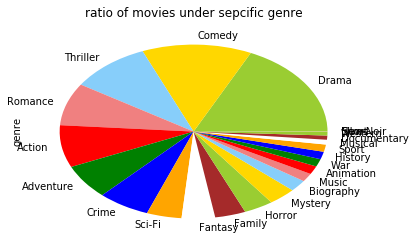

In [114]:
colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral','red','green','blue','orange','white','brown']
ds['genre'].value_counts().plot(kind='pie',title='ratio of movies under sepcific genre', colors=colors )
plt.show()

This pie-chart shows us that Comedy and Drama Movies are made more, followed by Action and Romance. Or we can assumption that this dataset is limited

In [121]:
ds_temp = ds.loc[ds['genre'] == 'Comedy']

In [ ]:
ds_temp1 = ds.loc[ds['genre'] == 'Comedy']

In [122]:
ds_temp

level_0             color        director_name  num_critic_for_reviews  \
17           5             Color         Nathan Greno                   324.0   
56          16             Color     Barry Sonnenfeld                   451.0   
111         32             Color          Dan Scanlon                   376.0   
129         37             Color        John Lasseter                   304.0   
137         39             Color          Lee Unkrich                   453.0   
174         50             Color           Peter Sohn                   298.0   
179         51             Color         Mark Andrews                   488.0   
187         53             Color         Brett Ratner                   162.0   
212         60             Color          Pete Docter                   408.0   
217         61             Color        Rob Letterman                   219.0   
228         64             Color     Barry Sonnenfeld                    85.0   
238         66             Color           David Ayer                   418.0   
240         67             Color          Tom Shadyac                   186.0   
256         71             Color          Pete Docter                   536.0   
293         80             Color        Mike Mitchell                   226.0   
304         82             Color             Don Hall                   384.0   
310         83             Color           Rich Moore                   377.0   
362         99             Color         Chris Miller                   227.0   
397        108             Color           Tim Burton                   276.0   
401        109             Color            Brad Bird                   318.0   
409        111             Color         Eric Darnell                   167.0   
412        112             Color           Shawn Levy                   185.0   
424        115             Color           Chris Buck                   406.0   
444        121             Color         Byron Howard                   225.0   
450        122             Color         Hoyt Yeatman                   145.0   
457        124             Color           Tim Burton                   526.0   
466        126             Color        Steve Hickner                   194.0   
471        127             Color  Jennifer Yuh Nelson                   284.0   
486        131             Color          Simon Wells                   132.0   
491        132             Color         David Bowers                   135.0   
...        ...               ...                  ...                     ...   
11292     3878   Black and White       Robinson Devor                    18.0   
11298     3881             Color        Bill Melendez                    43.0   
11308     3887             Color         Lynn Shelton                   171.0   
11311     3889             Color        David Hewlett                     8.0   
11315     3892             Color   Nathan Smith Jones                     1.0   
11325     3897             Color      Robert Townsend                    21.0   
11326     3898             Color        Peter Chelsom                    57.0   
11331     3900   Black and White        Larry Blamire                    88.0   
11334     3901             Color            E.L. Katz                   193.0   
11357     3909             Color      Myles Berkowitz                    32.0   
11362     3911             Color      Morgan Spurlock                   193.0   
11365     3912             Color        Brandon Trost                    66.0   
11366     3913             Color         Joe Swanberg                    65.0   
11371     3916             Color     Daniel Schechter                    15.0   
11375     3918             Color         Edward Burns                    36.0   
11381     3920             Color        Bruno Barreto                     1.0   
11384     3921             Color          Lena Dunham                   113.0   
11401     3929             Color      

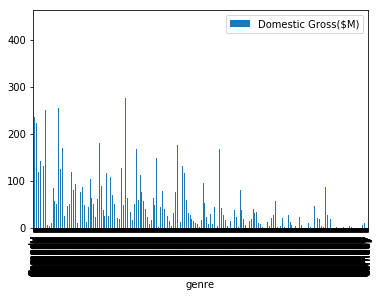

In [125]:
ds_temp.plot(x='genre', y=['Domestic Gross($M)'], kind='bar')


#### Decade

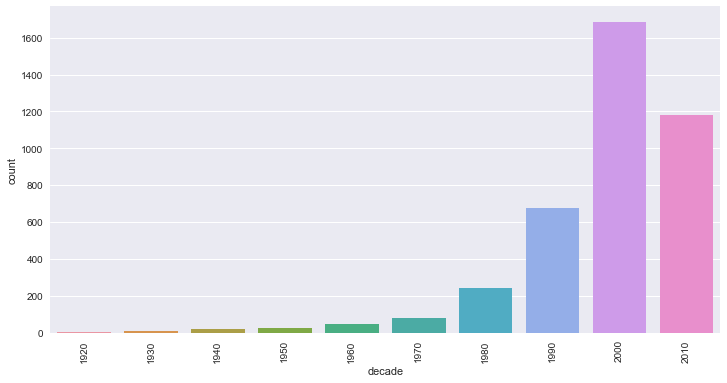

In [126]:
sns.set(style="darkgrid")
plt.figure(figsize = (12, 6))
sns.countplot(x="decade", data = dc)
ax = plt.xticks(rotation=90)

Most of the movies in this dataset are from 2010-2020

#### imdb-score

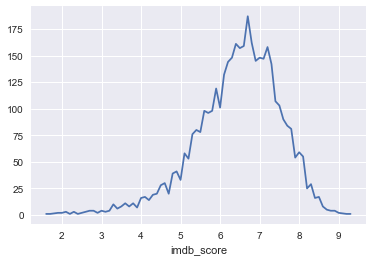

In [127]:
data_groupby_ratings = dc.groupby(['imdb_score'])['film_title'].count()
data_groupby_ratings.plot()

many of the movie are in the range of 5.0 to 8.0. Imdb does neither rates strictly on bad movies nor very generously on good movies. In our data of 3967 movies, there are only 167 movies that received a 8.0 or above 

In [129]:
dc[dc['imdb_score']>8.0].shape[0]

167

#### Duration

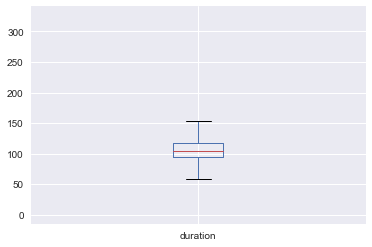

In [130]:
dc.duration.plot(kind='box')

All movies are between 50-150 minutes and most of the movies are between 90-130 minutes.

### Interesting Facts found in Visualizations


There are columns like Budget, Domestic Gross, Worldwide Gross that are represented in millions.To normalize the data, i will didvide them by 100. so that values are between 0 to 30 

In [137]:

ds['Domestic Gross($M)'] = ds['Domestic Gross($M)']/100
ds['Worldwide Gross($M)'] = ds['Worldwide Gross($M)']/100
ds['Budget($M)'] = ds['Budget($M)']/100

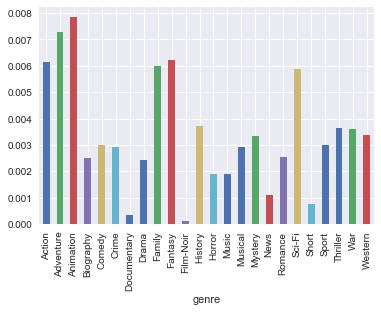

In [139]:
dg = ds.groupby(['genre'])['Budget($M)'].mean()

dg.plot.bar()

We can see that Animation movies spends the most money for making the films. This could be due the VFX and graphics cost. 

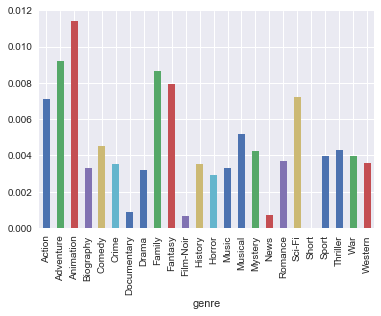

In [140]:
dg = ds.groupby(['genre'])['Domestic Gross($M)'].mean()

dg.plot.bar()


From the two graphs we can infer that - More the Budget, More the Gross/profit collected, however, not true for genre like history because there might be very few people who take a liking to historic movies.

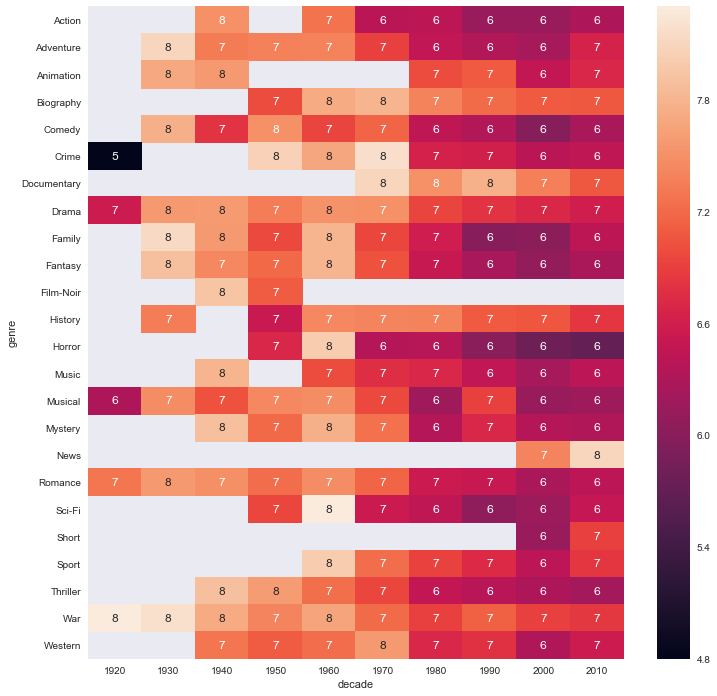

In [141]:
import seaborn as sns

plt.figure(figsize=(12,12))
sns.heatmap(ds.groupby([
       'genre', 'decade']).imdb_score.mean().unstack(),annot=True, fmt=".0f")

From this heat map, we can see that more movies were started to make in the 1980s.Film-Noir and News are very few in this dataset. 
1. All BioGraphy Movies and war have almost a steady and stable imdb score. 
2. Romance movies have gradually decresed in their Imdb rating. This may be because as the genration changes, people may find romance little cheesy
3. horror movies are also decreasing in rating because according to me, audience is bored to see the same clowns, ghosts, possesions, etc. 


In [144]:
import matplotlib.pyplot as plt
import numpy as np

def scatterplot(x_data, y_data, x_label="", y_label="", title="", color = "r", yscale_log=False):

    # Create the plot object
    _, ax = plt.subplots()

    # Plot the data, set the size (s), color and transparency (alpha)
    # of the points
    ax.scatter(x_data, y_data, s = 10, color = color, alpha = 0.75)

    if yscale_log == True:
        ax.set_yscale('log')

    # Label the axes and provide a title
    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)

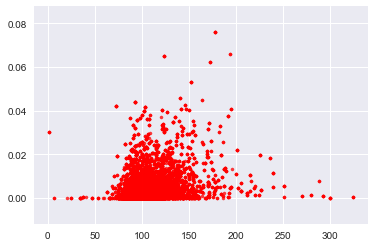

In [145]:
scatterplot(ds.duration, ds['Domestic Gross($M)'])

As we have already seen that most movies are between 50-120 min. The movies having duration around 120 min seem to be making the most profits. Although there are a handful of movies that are longer and made more profits 

C:\Users\hashi\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\hashi\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


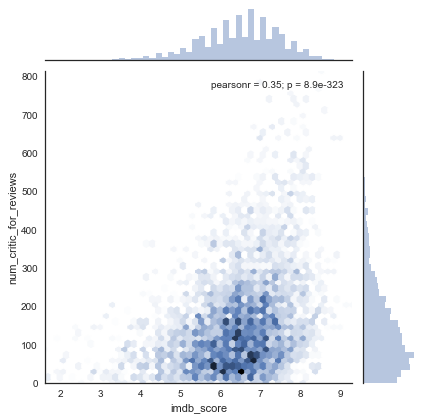

In [146]:
with sns.axes_style('white'):
    sns.jointplot("imdb_score","num_critic_for_reviews", ds, kind='hex')

Where the number of critic reviews are the least, the IMDB score is greater. 
So, we can assume that IMDB does not factor in the number of critics reviewing the movie becuase if the number of critics reviewing a movie is greater, then there can be an imbalance in the ratings.

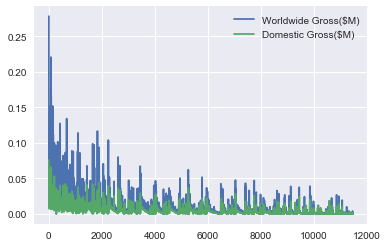

In [147]:
ds[['Worldwide Gross($M)','Domestic Gross($M)']].plot()
plt.show()

From the above plot we can say that, in most of the cases doemestic gross is directly proportional to world wide gross.

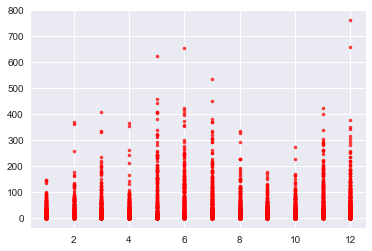

In [149]:
fig = scatterplot(dc.Month_num, dc['Domestic Gross($M)'])

As seen in the above plot, we can come to the conclusion that the most profits are received in the month of May, June and November. We can assume that during summer there are a lot of people watching movies because, students get their summer break. Also in November,due to holidays like Thanksgiving and Black Friday, many people  go to the movies.

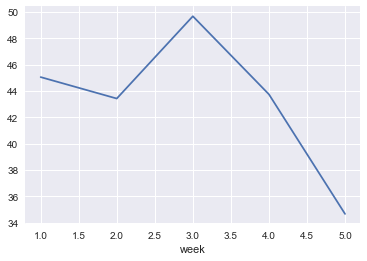

In [150]:
data_groupby_gross = dc.groupby(['week'])['Domestic Gross($M)'].mean()
data_groupby_gross.plot()

We can see that between weeks 3 & 4, the highest profit is incurred. 

This also supports our previous assumption because thanksgiving is in the 3rd week of november thus pulling in crowds to the theatres.

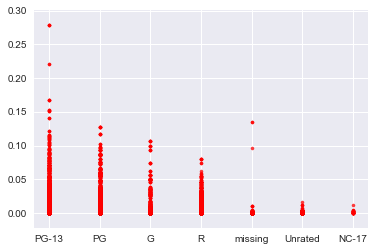

In [153]:
scatterplot(ds.content_rating, ds['Worldwide Gross($M)'])

Here we can see that the highest gross is received for the movies with content rating PG-13 and PG because these movies are family friendly films and liked by everyone.
In one of the above bar graphs we saw that animation, one the most common PG/PG-13 movies, received the highest worldwide gross. Which further proves that content rated does play a part on the profit that the movie makes.

## Conclusion

Using all this data and visualization, we can conclude that Profit of the movie depends on various factors like, Content Rating, genre, Duration and even the day at which the movie is released out in the theatres. 

The best scenario that i came across through my analysis is that having a strategy on when to release your movie helps in gathering more audience and more profits

### Why is this valuable?
This analysis can be used by 
1. Movie distribution agencies to figure out the best time to release and distribute their movies to yeild maximum profits. 
2. It also helps these agencies to distrubute only those movies with genres that have a potential to reach a larger audience.
3. This analysis can also be used by production houses or producers who are intrerested in investing their money in the right movies.

## Negative Results

C:\Users\hashi\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\hashi\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


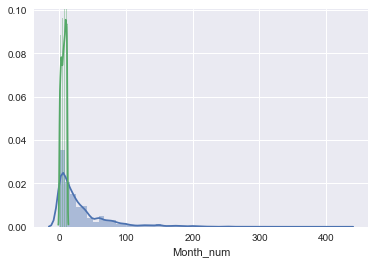

In [154]:
sns.distplot(dc['Budget($M)'])
sns.distplot(dc['Month_num']);


I wanted to find a relation between Month and budget, but that doesnt really make sense. 

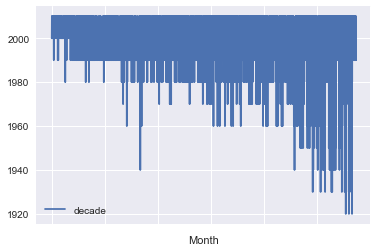

In [155]:
ds.plot(x='Month', y='decade' )

In [ ]:
ds['director_facebook_likes']

I also checked Month Vs Year but found no substantial results

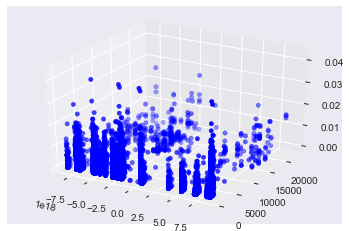

In [158]:
from mpl_toolkits.mplot3d import Axes3D
x1 = ds.genre.values
x = [hash(l) for l in x1]
y = ds.director_facebook_likes.values
z = ds['Budget($M)'].values
%matplotlib inline
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, s=20, c='b')
plt.show()

I wanted to find a relation between director facebook likes and Budget, to find something interesting, but this graoh diesnt really prove anything.

## Future Work

 The main challenge was to find a second dataset after IMDB to correlate and infer anything. 
However, had there been more time, I wouldnt have to split the genres and make duplicate rows,rather use a clustering algorithm. 
also, I could create a predictor , where i could Train this data and given the information about budget, genre , year and month of release, actor, director, I can predict whether the movie is good or bad 